In [ ]:
# First we download the data

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY' -O X.txt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=15HONyJXWARLhNAtNQXFWAH8pvGPahh_U' -O y.txt

--2021-03-21 11:39:40--  https://docs.google.com/uc?export=download&id=1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY
Resolving docs.google.com (docs.google.com)... 74.125.20.139, 74.125.20.138, 74.125.20.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0l8l966tflqnrt9dedj4jva8lm5n9bo3/1616326725000/03911252296720181638/*/1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY?e=download [following]
--2021-03-21 11:39:41--  https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0l8l966tflqnrt9dedj4jva8lm5n9bo3/1616326725000/03911252296720181638/*/1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY?e=download
Resolving doc-0c-88-docs.googleusercontent.com (doc-0c-88-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0c-88-docs.googleusercontent.com (doc-0c-88-docs.

In [ ]:
# We load the data

import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

In [ ]:
# We plot the data

import matplotlib.pyplot as plt

##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

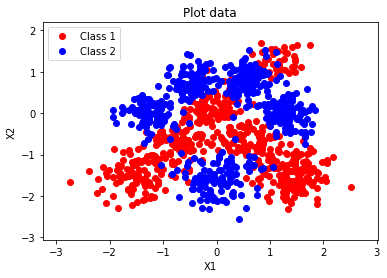

In [ ]:
plot_data(X, y)

In [ ]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

In [ ]:
# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))

##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))

##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# y: vector of binary output labels 
# w: vector of model parameters
#
# Output: The average loglikelihood
#

def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#

def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)

In [ ]:
# LAPLACE APPROXIMATION
from scipy import optimize

#FINDING THE MEAN OF OUR GAUSSIAN APPROXIMATION

#Running the code onto the radial basis functions
def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

def func1(params, *args): #function evaluated after taking log of both sides
    '''
    Calculates the -logf(w) function to be used for the Laplace Approximation. X, y are the input matrix and output labels respectively, and weights are any weight vector. 
    Sigma_2 represents the variance of the prior Gaussian. Assume bias term has already been added to X term. Logistic_f is by default the logistic function.
    Returns the negative value of log(f(w)) as the optimization algorithm is used for minimization.
    '''
    X_value, y_value, sigma_value = args[0], args[1], args[2] #collect our argument terms into variables

    logistic_f = lambda x : 1.0 / (1.0 + np.exp(-x)) #creating our logistic function
    w = params.reshape((X_value.shape[1], 1)) #reshaping w
    hyp = logistic_f(X_value @ w) #hypothesis vector
    
    return float(-(np.dot(y_value,  np.log(hyp))) - (np.dot((1 - y_value), np.log(1-hyp))) + (1/(2*sigma_value))*(np.transpose(w) @ w )) #returns the negative of log(f(w))

#Hyperparameter values
l = 0.1 # Width of the Gaussian basis function. 
sigma_squared = 1 # Variance of our prior

#Convert training and test dataset into our basis functions, with the additional weight bias term added
X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# Obtaining MAP solution: mean of the Gaussian approximation
initial_w = np.random.randn(X_tilde_train.shape[1]) #initialize random weight vector
solution = optimize.fmin_l_bfgs_b(func1, initial_w, args=(X_tilde_train,y_train, sigma_squared), approx_grad=True) #Running minimization optimization algorithm

map_solution = solution[0].reshape((X_tilde_train.shape[1], 1)) #getting our MAP solution
#print(map_solution)

In [ ]:
#FINDING THE VARIANCE OF OUR GAUSSIAN APPROXIMATION VIA BISHOP BOOK METHOD

num_weights = X_tilde_train.shape[1] #number of features (801)
covariance_matrix_0 = np.identity(num_weights, dtype = float) * sigma_squared #covariance matrix of the prior
inverse = np.linalg.inv(covariance_matrix_0) #compute inverse of S_0

map_solution_reshaped = map_solution.reshape(1, map_solution.shape[0]) #reshaping the map solution

def computeA(X, weights):
    '''
    Computes a section of the equation 4.143 in Bishops Book matrix for the variance Gaussian approximation.
    '''
    num_examples = X.shape[0]
    num_feat = X.shape[1]
    matrix = np.zeros((num_feat, num_feat))

    logistic_f = lambda x : 1.0 / (1.0 + np.exp(-x)) #lambda function for logistic function
    hyp = logistic_f(X @ np.transpose(weights))

    for i in range(num_examples):
        row = X[i,:]
        row = row.reshape((num_feat, 1))
        hypo = float(hyp[i])
        matrix = matrix + (hypo * (1 - hypo)) *  (row @ np.transpose(row) )

    return matrix

covariance_part = computeA(X_tilde_train, map_solution_reshaped)  #evaluated at the MAP solution 

Sn_inv = inverse + covariance_part #compute the full covariance matrix for the Gaussian Approximation for f(w)
Sn = np.linalg.inv(Sn_inv) #Sn = A inverse, Sn = covariance of Gaussian Approximation

print(Sn)

[[ 2.95766828e-02 -5.97134967e-03 -3.54443524e-03 ... -6.06195481e-03
  -2.98433275e-03 -2.63562087e-03]
 [-5.97134967e-03  8.29542207e-01  7.19083365e-04 ...  1.22387125e-03
   6.02518359e-04  5.32115582e-04]
 [-3.54443524e-03  7.19083365e-04  9.01613116e-01 ...  7.26457607e-04
   3.57638963e-04  3.15849737e-04]
 ...
 [-6.06195481e-03  1.22387125e-03  7.26457607e-04 ...  8.06813557e-01
   6.11660560e-04  5.40189537e-04]
 [-2.98433275e-03  6.02518359e-04  3.57638963e-04 ...  6.11660560e-04
   9.06570697e-01  2.17680637e-04]
 [-2.63562087e-03  5.32115582e-04  3.15849737e-04 ...  5.40189537e-04
   2.17680637e-04  9.13409901e-01]]


In [ ]:
# APPROXIMATION OF OUR PREDICTIVE DISTRIBUTION 

#loading in data
X_vals = X_tilde_train 
y_val = y_train 

#getting useful features
num_feat = X_vals.shape[1] #number of features (801)
num_ex = X_vals.shape[0] #number of examples (800 for training)

#Defining kappa function
def kappa(sigma_sqr):
    '''
    Calculates the kappa function, where argument is the variance.
    '''
    return (1 + np.pi * sigma_sqr / 8) ** (-0.5)

def predictiveDistribution(X, weight_sol, variance, kappa = kappa, logistic = logistic): 
    '''
    Function that returns an array of predictions over the X dataset, given the MAP solution weight_sol, covariance matrix Sn, with kappa being the kappa function,
    and logistic being the logistic function.
    '''
    prediction_array = []
    num_feat = X.shape[1] #number of features (801)
    num_ex = X.shape[0] #number of examples (800 for training)
    for i in range(num_ex): #finding predictive distribution of all training examples
        one_example = X[i,: ]
        one_example_reshaped = one_example.reshape((1, num_feat))
        mu_a =  one_example_reshaped @ weight_sol #compute the mu_a term  
        sigma_a_squared = one_example_reshaped @ variance @ np.transpose(one_example_reshaped) #computing sigma_a_squared term
        prediction_array.append(float(logistic(kappa(float(sigma_a_squared)) * float(mu_a)))) #append to our array
    return prediction_array

pr = predictiveDistribution(X_vals, map_solution, Sn)
#print(pr)

[0.30767775582463697, 0.10987918480206513, 0.11582005615892915, 0.10109509331886612, 0.465807610913187, 0.8952110249546449, 0.865991125961868, 0.1654671541761845, 0.9260478374726632, 0.16875882347742843, 0.06623394404974275, 0.13071929117898448, 0.33661460576172686, 0.543519564106136, 0.12853719290046975, 0.794119707500448, 0.15654222379018165, 0.6606085634337258, 0.2808666509340407, 0.4595028872380763, 0.7550678652351975, 0.14025452685291942, 0.16563984597087428, 0.7317116515713906, 0.5160885930716508, 0.8924017651738093, 0.10172660576286036, 0.92336160073267, 0.070816653856965, 0.5861208677961588, 0.8642738581493614, 0.17839168224344312, 0.3180535060704663, 0.8580891700981086, 0.4696258458062867, 0.9290961569804103, 0.934999362574205, 0.1794880979736232, 0.36108879344584754, 0.34123142500496184, 0.1693933808668921, 0.39974967443251597, 0.9035604678763702, 0.09127456874801708, 0.8764556468297631, 0.21135160347383541, 0.820190347696457, 0.9331905627243678, 0.11476679131107283, 0.901462

In [ ]:
# APPROXIMATION OF MODEL EVIDENCE
from numpy import linalg as LA

#finding variables
magnitude = LA.norm(Sn) #find magnitude of Sn
num_feat = X_tilde_train.shape[1] #number of features
num_examples = X_tilde_train.shape[0] #number of examples

y_val2 = y_train.reshape((800,1))

def logfw(w, x, y): #function evaluated after taking log of both sides
    return float((np.transpose(y) @ np.log(1.0 / (1.0 + np.exp(- x @ w)))) + (np.transpose(1 - y) @ np.log(1-(1.0 / (1.0 + np.exp(- x @ w))))) - (1/(2*sigma_squared))*(np.transpose(w)@ w))
  
#Evaluating log of model evidence via method in the slides
log_Z = logfw(map_solution, X_tilde_train, y_val2) + (num_feat/2) * np.log(2*np.pi) -0.5* np.log(magnitude) #evaluating the log of model evidence
print(f'log(Z) via Slides Method: {log_Z/num_examples}') #normalizing over no. of examples

#Evaluate log of model evidence (likelihood) via Bishop Approximation
like = 1.0 / (1.0 + np.exp(- X_tilde_train @ map_solution)) #evaluating likelihood
log_likelihood = 0
for i in range(num_examples):
    log_likelihood += np.log(like[i])

log_Z2 = log_likelihood[0] - 0.5 * num_feat * np.log(num_examples) 
print(f'log(Z) via Bishop Method: {log_Z2/num_examples}')


log(Z) via Slides Method: 0.6160804129486901
log(Z) via Bishop Method: -4.437804067413948


In [ ]:
def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

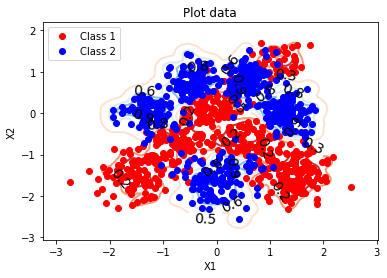

In [ ]:
#Visualizing MAP solution
l = 0.1
plot_predictive_distribution(X, y, map_solution, lambda x : evaluate_basis_functions(l, x, X_train))

In [ ]:
# Predictions for our MAP solution
final_pred = (predict(X_tilde_test, map_solution) > 0.5)
final_actual_pred = predict(X_tilde_test, map_solution)
counter = 0
false_pos = 0
false_neg = 0
true_pos = 0
true_neg = 0

for pred in final_pred: #run through 200 test examples
  if int(pred) == 1 and y_test[counter] == 1:
    true_pos +=1 
  elif int(pred) == 1 and y_test[counter] == 0:
    false_pos +=1
  elif int(pred) == 0 and y_test[counter] == 1:
    false_neg +=1
  elif int(pred) == 0 and y_test[counter] == 0:
    true_neg +=1
  counter +=1

no_positives = len([q for q in y_test if q == 1])
no_neg = 200 - no_positives

print(f'False positives: {false_pos/no_neg}')
print(f'False negatives: {false_neg/no_positives}')
print(f'True positives: {true_pos/no_positives}')
print(f'True negatives: {true_neg/no_neg}')

for i in range(20,40):
    print(f'Prediction: {final_actual_pred[i]}, i.e {int(final_pred[i])}, where actual: {y_test[i]}. This prediction is {int(final_pred[i]) == y_test[i]}.')

False positives: 0.10526315789473684
False negatives: 0.13953488372093023
True positives: 0.8604651162790697
True negatives: 0.8947368421052632
Prediction: [0.494032], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.17874674], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.11641101], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.56871158], i.e 1, where actual: 0.0. This prediction is False.
Prediction: [0.14073929], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.21016795], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.31958673], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.26054603], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.14754956], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.10227263], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.04255677], i.e 0, where actual: 0.0. This prediction is True.
Prediction

In [ ]:
# Prediction for our predictive distribution

predictions_dist = predictiveDistribution(X_tilde_test, map_solution, Sn)

final_pred1 = (np.array(predictions_dist) > 0.5)

counter = 0
false_pos = 0
false_neg = 0
true_pos = 0
true_neg = 0

for pred in final_pred1:
    if int(pred)  == 1 and y_test[counter] == 1.:
        true_pos +=1 
    elif int(pred ) == 1 and y_test[counter] == 0:
        false_pos +=1
    elif int(pred ) == 0 and y_test[counter] == 1.:
        false_neg +=1
    elif int(pred ) == 0 and y_test[counter] == 0:
        true_neg +=1
    counter +=1

no_positives = len([q for q in y_test if q == 1])
no_neg = 200 - no_positives

print(f'False positives: {false_pos/no_neg}')
print(f'False negatives: {false_neg/no_positives}')
print(f'True positives: {true_pos/no_positives}')
print(f'True negatives: {true_neg/no_neg}')

for i in range(20, 40):
    print(f'Prediction: {predictions_dist[i]}, i.e {int(final_pred1[i])}, where actual: {y_test[i]}. This prediction is {int(final_pred1[i]) == y_test[i]}.')

False positives: 0.10526315789473684
False negatives: 0.13953488372093023
True positives: 0.8604651162790697
True negatives: 0.8947368421052632
Prediction: 0.4946697735847905, i.e 0, where actual: 0.0. This prediction is True.
Prediction: 0.21624027492355896, i.e 0, where actual: 0.0. This prediction is True.
Prediction: 0.16079441652257545, i.e 0, where actual: 0.0. This prediction is True.
Prediction: 0.5607319749784491, i.e 1, where actual: 0.0. This prediction is False.
Prediction: 0.17368296787534343, i.e 0, where actual: 0.0. This prediction is True.
Prediction: 0.22626419214749205, i.e 0, where actual: 0.0. This prediction is True.
Prediction: 0.33132035303454477, i.e 0, where actual: 0.0. This prediction is True.
Prediction: 0.28047314191974426, i.e 0, where actual: 0.0. This prediction is True.
Prediction: 0.18591987335991314, i.e 0, where actual: 0.0. This prediction is True.
Prediction: 0.14521985369748072, i.e 0, where actual: 0.0. This prediction is True.
Prediction: 0.084

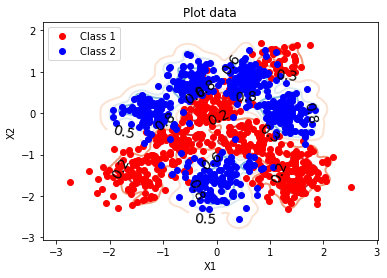

In [ ]:
# Visualising prediction distribution contours
def plot_predictive_distribution1(X, y, map_solution, Sn, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))

    p_dist = predictiveDistribution(X_tilde, map_solution, Sn)

    Z = np.array(p_dist)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

#Hyperparameters
l = 0.1
plot_predictive_distribution1(X, y, map_solution, Sn, lambda x : evaluate_basis_functions(l, x, X_train))

In [ ]:
# Compute the final loglikelihoods for test and training dataset for predictive distribution
def compute_average_ll_pred(X_tilde, y, w, Sn): 
    predictions_dist = np.array(predictiveDistribution(X_tilde, w, Sn))
    predictions_dist = predictions_dist.reshape((predictions_dist.shape[0],1))
    y = y.reshape((y.shape[0],1))
    return np.mean(y * np.log(predictions_dist) + (1 - y) * np.log(1.0 - predictions_dist))

# Compute final loglikelihood for test and training dataset for MAP
def compute_average_ll_MAP(X_tilde, y, w):
    y = y.reshape((y.shape[0],1))
    pred = predict(X_tilde, w)
    return np.mean(y * np.log(pred) + (1 - y) * np.log(1.0 - pred))

# Train dataset
ll_train_MAP = compute_average_ll_MAP(X_tilde_train, y_train, map_solution) #MAP solution
ll_train_PRED = compute_average_ll_pred(X_tilde_train, y_train, map_solution, Sn) #Predictive Distribution

# Test dataset
ll_test_MAP = compute_average_ll_MAP(X_tilde_test, y_test, map_solution) #MAP solution
ll_test_PRED = compute_average_ll_pred(X_tilde_test, y_test, map_solution, Sn) #Predictive Distribution

In [ ]:
#Print out values
print(f'TRAIN DATASET: average loglikelihood for MAP: {ll_train_MAP}, and for PRED: {ll_train_PRED}')
print(f'TEST DATASET: average loglikelihood for MAP: {ll_test_MAP}, and for PRED: {ll_test_PRED}')

TRAIN DATASET: average loglikelihood for MAP: -0.21802230879271392, and for PRED: -0.2574741404081493
TEST DATASET: average loglikelihood for MAP: -0.3032487654435935, and for PRED: -0.32897343555837255


In [ ]:
# GRID SEARCH
# maximize model evidence over variance of prior and l

variance_vals = np.array([0.1, 0.2, 0.3, 0.5, 1, 5,7, 10, 20, 30]) #0.1 to 30
l_vals = np.array([0.01, 0.02, 0.03, 0.05, 0.1, 0.5, 0.75, 1, 3, 5]) # 0.01 to 5

#creating dictionary to store model evidence, variance then L
dictionary1 = {}
dictionary2 = {}
for i in variance_vals:
    for j in l_vals:
        dictionary1[('Var = ' + str(i), 'L = ' + str(j))] = 0
        dictionary2[('Var = ' + str(i), 'L = ' + str(j))] = 0

print(dictionary1)

{('Var = 0.1', 'L = 0.01'): 0, ('Var = 0.1', 'L = 0.02'): 0, ('Var = 0.1', 'L = 0.03'): 0, ('Var = 0.1', 'L = 0.05'): 0, ('Var = 0.1', 'L = 0.1'): 0, ('Var = 0.1', 'L = 0.5'): 0, ('Var = 0.1', 'L = 0.75'): 0, ('Var = 0.1', 'L = 1.0'): 0, ('Var = 0.1', 'L = 3.0'): 0, ('Var = 0.1', 'L = 5.0'): 0, ('Var = 0.2', 'L = 0.01'): 0, ('Var = 0.2', 'L = 0.02'): 0, ('Var = 0.2', 'L = 0.03'): 0, ('Var = 0.2', 'L = 0.05'): 0, ('Var = 0.2', 'L = 0.1'): 0, ('Var = 0.2', 'L = 0.5'): 0, ('Var = 0.2', 'L = 0.75'): 0, ('Var = 0.2', 'L = 1.0'): 0, ('Var = 0.2', 'L = 3.0'): 0, ('Var = 0.2', 'L = 5.0'): 0, ('Var = 0.3', 'L = 0.01'): 0, ('Var = 0.3', 'L = 0.02'): 0, ('Var = 0.3', 'L = 0.03'): 0, ('Var = 0.3', 'L = 0.05'): 0, ('Var = 0.3', 'L = 0.1'): 0, ('Var = 0.3', 'L = 0.5'): 0, ('Var = 0.3', 'L = 0.75'): 0, ('Var = 0.3', 'L = 1.0'): 0, ('Var = 0.3', 'L = 3.0'): 0, ('Var = 0.3', 'L = 5.0'): 0, ('Var = 0.5', 'L = 0.01'): 0, ('Var = 0.5', 'L = 0.02'): 0, ('Var = 0.5', 'L = 0.03'): 0, ('Var = 0.5', 'L = 0.05'

In [ ]:
# GRID SEARCH ALGORITHM
#Helpful variables
y_val2 = y_train.reshape((800,1))
num_feat = X_tilde_train.shape[1]
num_examples = X_tilde_train.shape[0]

variance_vals = np.array([0.1, 0.2, 0.3, 0.5, 1, 5,7, 10, 20, 30]) #0.1 to 30
l_vals = np.array([0.01, 0.02, 0.03, 0.05, 0.1, 0.5, 0.75, 1, 3, 5]) # 0.01 to 5

def logfw3(w, x, y, sigma): #function evaluated after taking log of both sides
    return float((np.transpose(y) @ np.log(1.0 / (1.0 + np.exp(- x @ w)))) + (np.transpose(1 - y) @ np.log(1-(1.0 / (1.0 + np.exp(- x @ w))))) - (1/(2*sigma))*(np.transpose(w)@ w) - 0.5 * np.log(2 * np.pi * sigma))

for i in variance_vals:
    for j in l_vals:
      
        #HYPERPARAMETERS
        sigma_squared = i
        l = j
        
        X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
        X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))
        
        #Evaluating MAP solution
        initial_w = np.random.randn(X_tilde_train.shape[1]) #initialize random weight vector
        solution = optimize.fmin_l_bfgs_b(func1, initial_w, args=(X_tilde_train,y_train, sigma_squared), approx_grad=True) #Running minimization optimization algorithm
        map_solution = solution[0].reshape((X_tilde_train.shape[1], 1)) #getting our MAP solution

        #Find Sn and Magnitude
        num_weights = X_tilde_train.shape[1] #number of features (801)
        covariance_matrix_0 = np.identity(num_weights, dtype = float) * sigma_squared #covariance matrix of the prior
        inverse = np.linalg.inv(covariance_matrix_0) #compute inverse of S_0

        map_solution_reshaped = map_solution.reshape(1, map_solution.shape[0]) #reshaping the map solution
        covariance_part = computeA(X_tilde_train, map_solution_reshaped)  #evaluated at the MAP solution 
        Sn_inv = inverse + covariance_part #compute the full covariance matrix for the Gaussian Approximation for f(w)
        Sn = np.linalg.inv(Sn_inv) #Sn = A inverse, Sn = covariance of Gaussian Approximation

        magnitude = LA.norm(Sn_inv) #find magnitude of A

        #Evaluating log of model evidence via method in the slides
        log_Z = logfw3(map_solution, X_tilde_train, y_val2, sigma_squared) + (num_feat/2) * np.log(2*np.pi) -0.5* np.log(magnitude) #evaluating the log of model evidence
        normalized_log_Z = log_Z/num_examples
        print(f'Normalized Log(Z) for Variance = {i} and L = {j}: {normalized_log_Z}')
        dictionary1[('Var = ' + str(i), 'L = ' + str(j))] = normalized_log_Z

        #Bishop Method
        like = 1.0 / (1.0 + np.exp(- X_tilde_train @ map_solution)) #evaluating likelihood
        log_likelihood = 0
        for q in range(num_examples):
            log_likelihood += np.log(like[q])

        log_Z2 = log_likelihood[0] - 0.5 * num_feat * np.log(num_examples) 
        dictionary2[('Var = ' + str(i), 'L = ' + str(j))] = log_Z2/num_examples
        print('')
        print(f'Normalized Log(Z) via Bishop for Variance = {i} and L = {j}: {log_Z2/num_examples}')
        

Normalized Log(Z) for Variance = 0.1 and L = 0.01: 0.23691464411509464
Normalized Log(Z) via Bishop for Variance = 0.1 and L = 0.01: -4.021091383375478
Normalized Log(Z) for Variance = 0.1 and L = 0.02: 0.24003891931076013
Normalized Log(Z) via Bishop for Variance = 0.1 and L = 0.02: -4.021338009353716
Normalized Log(Z) for Variance = 0.1 and L = 0.03: 0.24608024963472988
Normalized Log(Z) via Bishop for Variance = 0.1 and L = 0.03: -4.021999055286289
Normalized Log(Z) for Variance = 0.1 and L = 0.05: 0.271077318323221
Normalized Log(Z) via Bishop for Variance = 0.1 and L = 0.05: -4.026848262998542
Normalized Log(Z) for Variance = 0.1 and L = 0.1: 0.3985128895367423
Normalized Log(Z) via Bishop for Variance = 0.1 and L = 0.1: -4.099868215737728
Normalized Log(Z) for Variance = 0.1 and L = 0.5: 0.6703077277899294
Normalized Log(Z) via Bishop for Variance = 0.1 and L = 0.5: -4.9370369490744785
Normalized Log(Z) for Variance = 0.1 and L = 0.75: 0.5974928756355795
Normalized Log(Z) via Bis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


Normalized Log(Z) for Variance = 0.1 and L = 3.0: -37.183685820831414
Normalized Log(Z) via Bishop for Variance = 0.1 and L = 3.0: -67.04879228761622
Normalized Log(Z) for Variance = 0.1 and L = 5.0: 0.2765260106101528
Normalized Log(Z) via Bishop for Variance = 0.1 and L = 5.0: -4.072732531606
Normalized Log(Z) for Variance = 0.2 and L = 0.01: 0.249137502589341
Normalized Log(Z) via Bishop for Variance = 0.2 and L = 0.01: -4.021630281159206
Normalized Log(Z) for Variance = 0.2 and L = 0.02: 0.2547447289707242
Normalized Log(Z) via Bishop for Variance = 0.2 and L = 0.02: -4.022636830171171
Normalized Log(Z) for Variance = 0.2 and L = 0.03: 0.26537025126671787
Normalized Log(Z) via Bishop for Variance = 0.2 and L = 0.03: -4.024981415599812
Normalized Log(Z) for Variance = 0.2 and L = 0.05: 0.30591249804108217
Normalized Log(Z) via Bishop for Variance = 0.2 and L = 0.05: -4.039094439003491
Normalized Log(Z) for Variance = 0.2 and L = 0.1: 0.4641701929104519
Normalized Log(Z) via Bishop f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


Normalized Log(Z) for Variance = 0.3 and L = 5.0: -1.3377790548592374
Normalized Log(Z) via Bishop for Variance = 0.3 and L = 5.0: -3.956573569405545
Normalized Log(Z) for Variance = 0.5 and L = 0.01: 0.2822368156355717
Normalized Log(Z) via Bishop for Variance = 0.5 and L = 0.01: -4.02709566741702
Normalized Log(Z) for Variance = 0.5 and L = 0.02: 0.29287257121944227
Normalized Log(Z) via Bishop for Variance = 0.5 and L = 0.02: -4.031176700800479
Normalized Log(Z) for Variance = 0.5 and L = 0.03: 0.3123163651549077
Normalized Log(Z) via Bishop for Variance = 0.5 and L = 0.03: -4.039991813204761
Normalized Log(Z) for Variance = 0.5 and L = 0.05: 0.3764760499280553
Normalized Log(Z) via Bishop for Variance = 0.5 and L = 0.05: -4.079733149125101
Normalized Log(Z) for Variance = 0.5 and L = 0.1: 0.5525481195015851
Normalized Log(Z) via Bishop for Variance = 0.5 and L = 0.1: -4.30527979835517
Normalized Log(Z) for Variance = 0.5 and L = 0.5: 0.6146702240795916
Normalized Log(Z) via Bishop 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in matmul
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#Finding max. model evidence
import operator

print(max(dictionary1.items(), key=operator.itemgetter(1)))
print(max(dictionary2.items(), key=operator.itemgetter(1)))

(('Var = 30.0', 'L = 0.1'), 0.7893015364719385)
(('Var = 30.0', 'L = 5.0'), -3.3464837461637558)


In [ ]:
#Removing outliers to get a better look at the data
import copy

d1 = copy.deepcopy(dictionary1) #making a copy incase
d2 = copy.deepcopy(dictionary2)

for key, value in dictionary1.items():
      if value == None:
          pass
      elif value < -3:
          dictionary1[key] = -3

for key, value in dictionary2.items():
      if value == None:
          pass
      elif value < -5:
          dictionary2[key] = -5

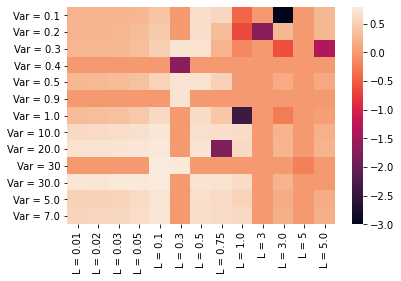

In [ ]:
#Heat Map Plot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

ser = pd.Series(list(dictionary1.values()), index=pd.MultiIndex.from_tuples(dictionary1.keys()))
df = ser.unstack().fillna(0)
df.shape
sns.heatmap(df)

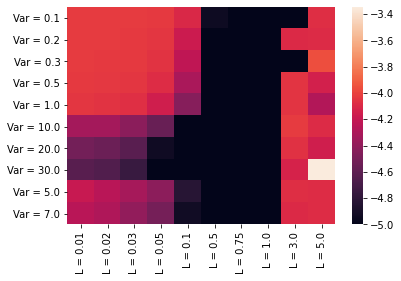

In [ ]:
ser = pd.Series(list(dictionary2.values()), index=pd.MultiIndex.from_tuples(dictionary2.keys()))
df = ser.unstack().fillna(0)
df.shape
sns.heatmap(df)

In [ ]:
# PART F

#Helpful variables
y_val2 = y_train.reshape((800,1))
num_feat = X_tilde_train.shape[1]
num_examples = X_tilde_train.shape[0]

variance_vals = [0.5] #PUT IN BEST VALUES
l_vals = [0.3]

def logfw3(w, x, y, sigma): #function evaluated after taking log of both sides
    return float((np.transpose(y) @ np.log(1.0 / (1.0 + np.exp(- x @ w)))) + (np.transpose(1 - y) @ np.log(1-(1.0 / (1.0 + np.exp(- x @ w))))) - (1/(2*sigma))*(np.transpose(w)@ w))

for i in variance_vals:
    for j in l_vals:
      
        #HYPERPARAMETERS
        sigma_squared = i
        l = j
        
        X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
        X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))
        
        #Evaluating MAP solution
        initial_w = np.random.randn(X_tilde_train.shape[1]) #initialize random weight vector
        solution = optimize.fmin_l_bfgs_b(func1, initial_w, args=(X_tilde_train,y_train, sigma_squared), approx_grad=True) #Running minimization optimization algorithm
        map_solution = solution[0].reshape((X_tilde_train.shape[1], 1)) #getting our MAP solution

        #Find Sn and Magnitude
        num_weights = X_tilde_train.shape[1] #number of features (801)
        covariance_matrix_0 = np.identity(num_weights, dtype = float) * sigma_squared #covariance matrix of the prior
        inverse = np.linalg.inv(covariance_matrix_0) #compute inverse of S_0

        map_solution_reshaped = map_solution.reshape(1, map_solution.shape[0]) #reshaping the map solution
        covariance_part = computeA(X_tilde_train, map_solution_reshaped)  #evaluated at the MAP solution 
        Sn_inv = inverse + covariance_part #compute the full covariance matrix for the Gaussian Approximation for f(w)
        Sn = np.linalg.inv(Sn_inv) #Sn = A inverse, Sn = covariance of Gaussian Approximation

        magnitude = LA.norm(Sn_inv) #find magnitude of Sn

        #Evaluating log of model evidence via method in the slides
        log_Z = logfw3(map_solution, X_tilde_train, y_val2, sigma_squared) + (num_feat/2) * np.log(2*np.pi) -0.5* np.log(magnitude) #evaluating the log of model evidence
        normalized_log_Z = log_Z/num_examples
        print(f'Normalized Log(Z) for Variance = {i} and L = {j}: {normalized_log_Z}')
        dictionary1[('Var = ' + str(i), 'L = ' + str(j))] = normalized_log_Z

        #Bishop Method
        like = 1.0 / (1.0 + np.exp(- X_tilde_train @ map_solution)) #evaluating likelihood
        log_likelihood = 0
        for q in range(num_examples):
            log_likelihood += np.log(like[q])

        log_Z2 = log_likelihood[0] - 0.5 * num_feat * np.log(num_examples) 
        dictionary2[('Var = ' + str(i), 'L = ' + str(j))] = log_Z2/num_examples
        print(f'Normalized Log(Z) via Bishop for Variance = {i} and L = {j}: {log_Z2/num_examples}')

        final_pred = (predict(X_tilde_test, map_solution) > 0.5)
        final_actual_pred = predict(X_tilde_test, map_solution)
        counter = 0
        false_pos = 0
        false_neg = 0
        true_pos = 0
        true_neg = 0

        for pred in final_pred: #run through 200 test examples
          if int(pred) == 1 and y_test[counter] == 1:
            true_pos +=1 
          elif int(pred) == 1 and y_test[counter] == 0:
            false_pos +=1
          elif int(pred) == 0 and y_test[counter] == 1:
            false_neg +=1
          elif int(pred) == 0 and y_test[counter] == 0:
            true_neg +=1
          counter +=1

        no_positives = len([q for q in y_test if q == 1])
        no_neg = 200 - no_positives

        print(f'False positives: {false_pos/no_neg}')
        print(f'False negatives: {false_neg/no_positives}')
        print(f'True positives: {true_pos/no_positives}')
        print(f'True negatives: {true_neg/no_neg}')

        for i in range(20,40):
            print(f'Prediction: {final_actual_pred[i]}, i.e {int(final_pred[i])}, where actual: {y_test[i]}. This prediction is {int(final_pred[i]) == y_test[i]}.')
                

Normalized Log(Z) for Variance = 0.5 and L = 0.3: 0.7184941841851312
Normalized Log(Z) via Bishop for Variance = 0.5 and L = 0.3: -5.017100981714259
False positives: 0.09649122807017543
False negatives: 0.10465116279069768
True positives: 0.8953488372093024
True negatives: 0.9035087719298246
Prediction: [0.25391293], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.03322491], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.01813897], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.6784753], i.e 1, where actual: 0.0. This prediction is False.
Prediction: [0.05907905], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.11316945], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.03197749], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.02396143], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0.19847984], i.e 0, where actual: 0.0. This prediction is True.
Prediction: [0

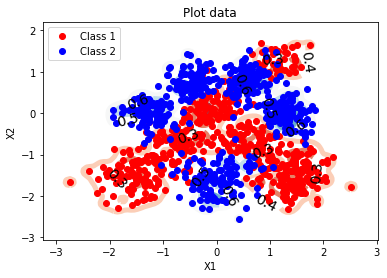

In [ ]:
# Visualising prediction distribution contours
def plot_predictive_distribution1(X, y, map_solution, Sn, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))

    p_dist = predictiveDistribution(X_tilde, map_solution, Sn)

    Z = np.array(p_dist)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 5)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

#Hyperparameters
l = 0.1
plot_predictive_distribution1(X, y, map_solution, Sn, lambda x : evaluate_basis_functions(l, x, X_train))

In [ ]:
# Compute the final loglikelihoods for test and training dataset for predictive distribution
def compute_average_ll_pred(X_tilde, y, w, Sn): 
    predictions_dist = np.array(predictiveDistribution(X_tilde, w, Sn))
    predictions_dist = predictions_dist.reshape((predictions_dist.shape[0],1))
    y = y.reshape((y.shape[0],1))
    return np.mean(y * np.log(predictions_dist) + (1 - y) * np.log(1.0 - predictions_dist))

# Compute final loglikelihood for test and training dataset for MAP
def compute_average_ll_MAP(X_tilde, y, w):
    y = y.reshape((y.shape[0],1))
    pred = predict(X_tilde, w)
    return np.mean(y * np.log(pred) + (1 - y) * np.log(1.0 - pred))

# Train dataset
ll_train_MAP = compute_average_ll_MAP(X_tilde_train, y_train, map_solution) #MAP solution
ll_train_PRED = compute_average_ll_pred(X_tilde_train, y_train, map_solution, Sn) #Predictive Distribution

# Test dataset
ll_test_MAP = compute_average_ll_MAP(X_tilde_test, y_test, map_solution) #MAP solution
ll_test_PRED = compute_average_ll_pred(X_tilde_test, y_test, map_solution, Sn) #Predictive Distribution

#Print out values
print(f'TRAIN DATASET: average loglikelihood for MAP: {ll_train_MAP}, and for PRED: {ll_train_PRED}')
print(f'TEST DATASET: average loglikelihood for MAP: {ll_test_MAP}, and for PRED: {ll_test_PRED}')

TRAIN DATASET: average loglikelihood for MAP: -0.1709607348450146, and for PRED: -0.18610669253891035
TEST DATASET: average loglikelihood for MAP: -0.2264570155061037, and for PRED: -0.234903181270779
